In [1]:
import pandas as pd

year="2018"

# Paths to the log files
log_files = {
    "EHE": "../results/events/1I/MH44/" + year + "/EHE.D_" + year + ".csv",
    "EHN": "../results/events/1I/MH44/" + year + "/EHN.D_" + year + ".csv",
    "EHZ": "../results/events/1I/MH44/" + year + "/EHZ.D_" + year + ".csv",
}

plot_dir = "../results/plots/"

dfs = {}

for channel, path in log_files.items():
    df = pd.read_csv(path)

    # Extract base datetime and offset seconds
    base_time = df["eventfilename"].str.extract(r"(\d{8}_\d{6})")[0]
    offset_sec = df["eventfilename"].str.extract(r"_(\d{4})\.mat")[0].astype(int)

    df["detectiontime"] = pd.to_datetime(df['detectiontime'], format="%Y-%m-%d %H:%M:%S")
    df["datetime_base"] = pd.to_datetime(base_time, format="%Y%m%d_%H%M%S")
    df["datetime"] = df["datetime_base"] + pd.to_timedelta(offset_sec, unit="s")

    # Extra columns
    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["hour"] = df["datetime"].dt.hour
    df["minute"] = df["datetime"].dt.minute
    df["second"] = df["datetime"].dt.second

    # Cut everything before 2018-09-01
    cut_year = int(year)
    cut_month = 10
    cut_day = 1

    # Build cutoff date
    cut_date = pd.Timestamp(year=cut_year, month=cut_month, day=cut_day)

    # Filter the DataFrame
    df = df[df["detectiontime"] <= cut_date]

    # Store in dictionary
    dfs[channel] = df

# Access each DataFrame like:
df_EHE = dfs["EHE"]
df_EHN = dfs["EHN"]
df_EHZ = dfs["EHZ"]

# Add suffixes so we don't get conflicts
def suffix_df(df, suffix):
    """Rename columns to add suffix, except detectiontime."""
    return df.rename(columns=lambda c: f"{c}_{suffix}" if c != "detectiontime" else c)

df_EHE = suffix_df(df_EHE, "EHE")
df_EHN = suffix_df(df_EHN, "EHN")
df_EHZ = suffix_df(df_EHZ, "EHZ")

# print(df_EHE.head())
# print(df_EHN.head())
# print(df_EHZ.head())

print(df_EHE.shape)
print(df_EHN.shape)
print(df_EHZ.shape)

(18914, 16)
(14300, 16)
(13952, 16)


(47166, 17)


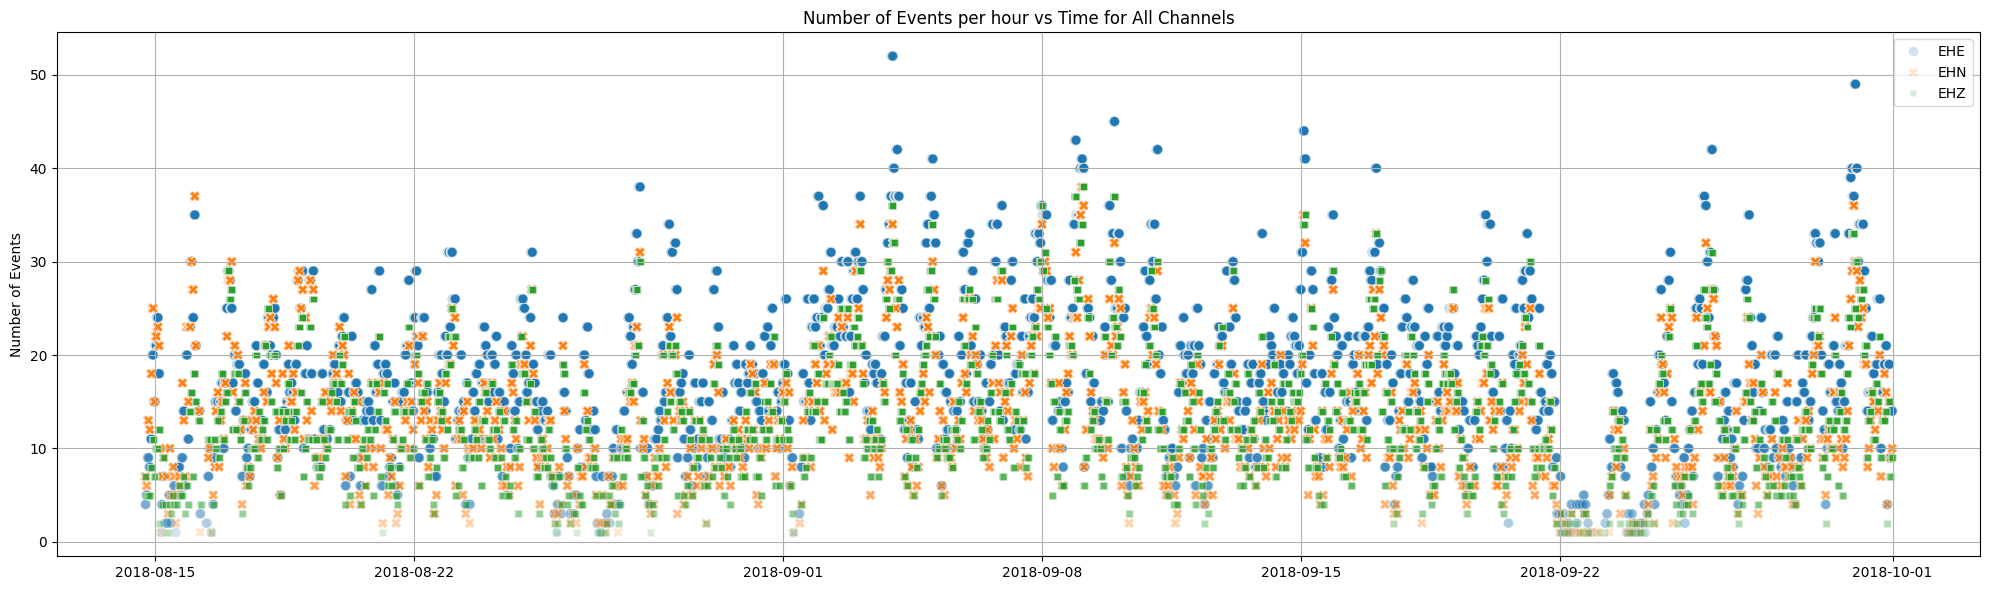

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'channel' column to each DataFrame
dfs_combined = []
for channel, df_channel in dfs.items():
    df_temp = df_channel.copy()
    df_temp['channel'] = channel
    dfs_combined.append(df_temp)

# Combine into one DataFrame
df_all = pd.concat(dfs_combined, ignore_index=True)

print(df_all.shape)

# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_all, x='detectiontime', y='numevents', hue='channel', style='channel', s=50, alpha=0.2)

plt.xlabel("")
plt.ylabel("Number of Events")
plt.title("Number of Events per hour vs Time for All Channels")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'numevents__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

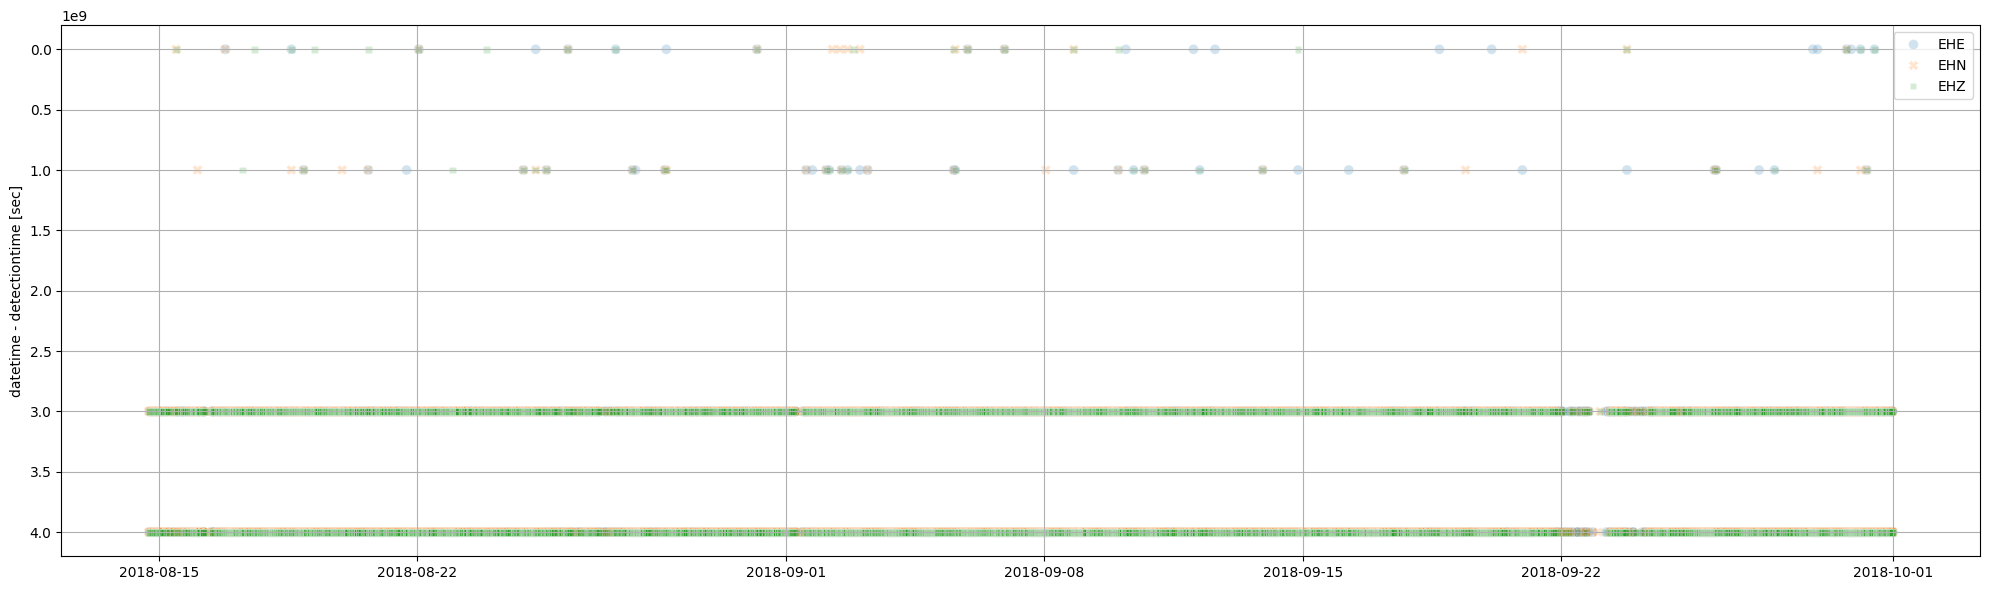

In [3]:
# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_all, x='detectiontime', y=df_all['datetime']-df_all['detectiontime'], hue='channel', style='channel', s=50, alpha=0.2)

plt.xlabel("")
plt.ylabel("datetime - detectiontime [sec]")
# plt.title("Window duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'detectiontime__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

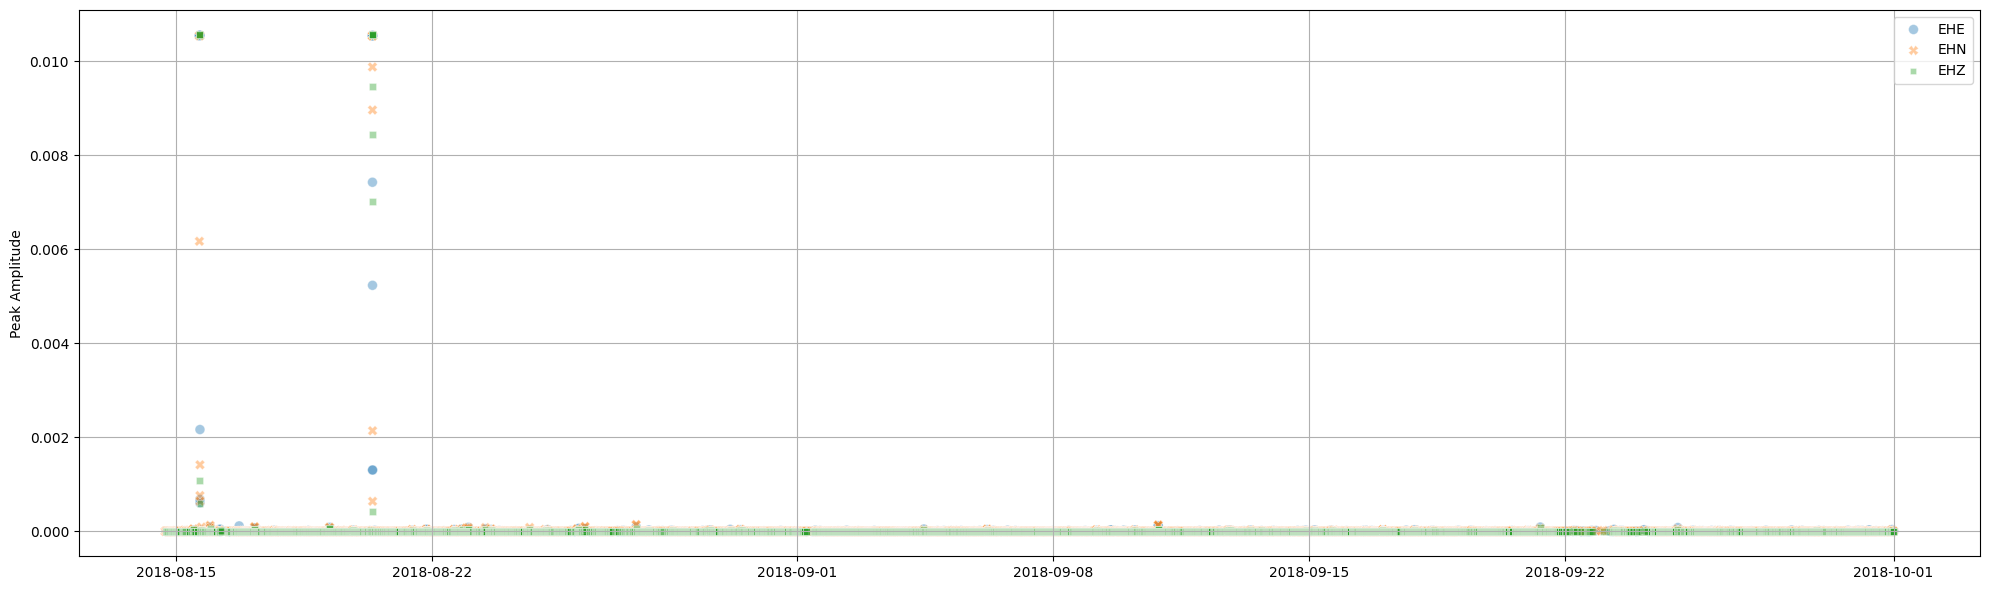

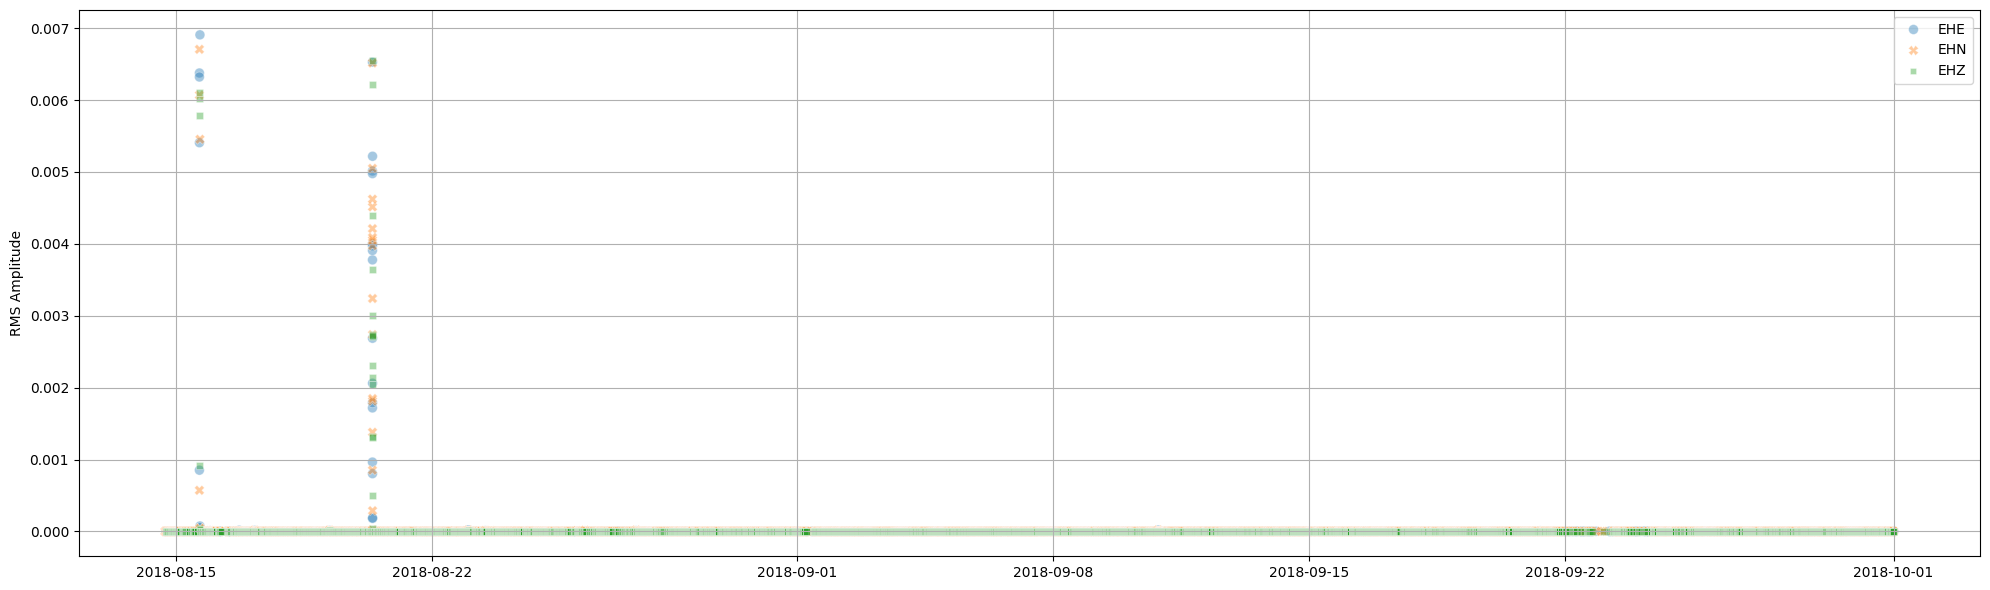

In [4]:
# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_all, x='detectiontime', y='peak_amp', hue='channel', style='channel', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("Peak Amplitude")
# plt.title("Peak Amplitude")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'peakamplitude__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_all, x='detectiontime', y='rms_amp', hue='channel', style='channel', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("RMS Amplitude")
# plt.title("Number of Events per hour vs Time for All Channels")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'rmsamplitude__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

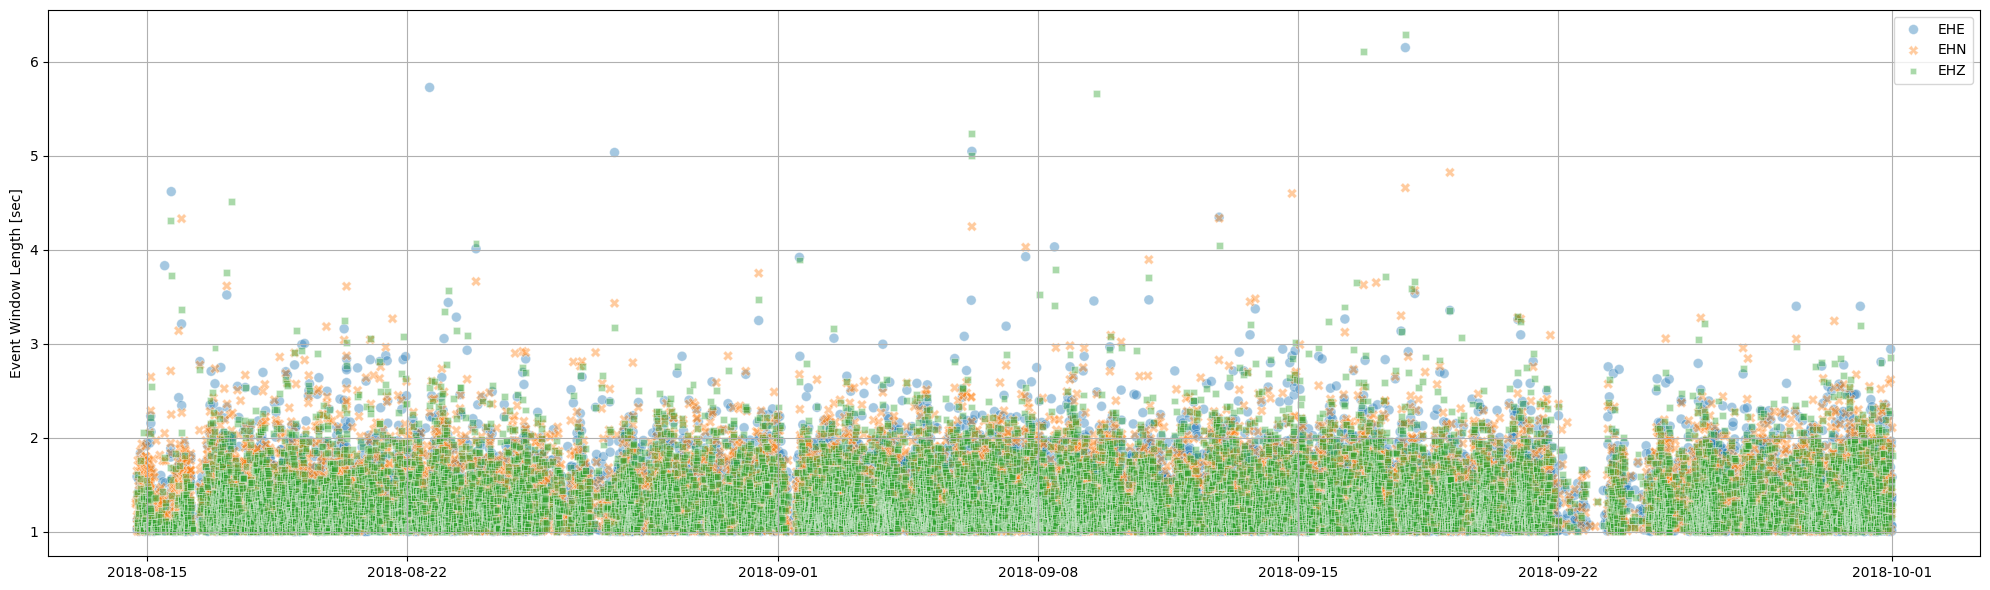

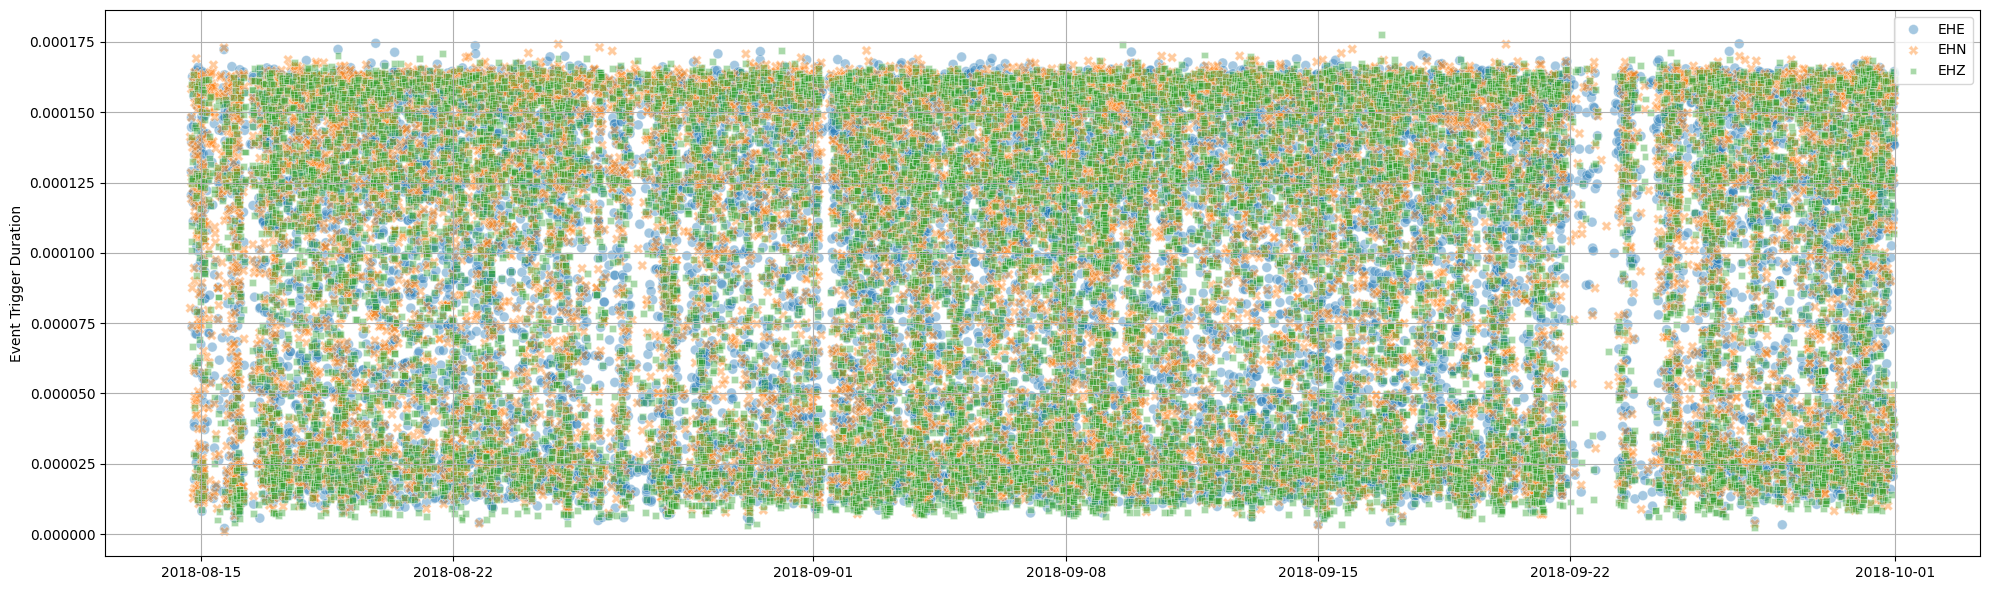

In [5]:
# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_all, x='detectiontime', y='windowlength', hue='channel', style='channel', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("Event Window Length [sec]")
# plt.title("Signal Duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'windowlength__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_all, x='detectiontime', y='triggerduration', hue='channel', style='channel', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("Event Trigger Duration")
# plt.title("Signal Duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'triggerduration__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

In [6]:

# Load
# df_EHE = pd.read_csv("detections_EHE.csv")
# df_EHN = pd.read_csv("detections_EHN.csv")
# df_EHZ = pd.read_csv("detections_EHZ.csv")

# Convert times
# for df in [df_EHE, df_EHN, df_EHZ]:
#     df["detectiontime"] = pd.to_datetime(df["detectiontime"])


# Merge step by step
tol = pd.Timedelta(seconds=0.5)

merged = pd.merge_asof(
    df_EHE.sort_values("detectiontime"),
    df_EHN.sort_values("detectiontime"),
    on="detectiontime", direction="nearest", tolerance=tol
)

merged = pd.merge_asof(
    merged.sort_values("detectiontime"),
    df_EHZ.sort_values("detectiontime"),
    on="detectiontime", direction="nearest", tolerance=tol
)

# Now we can safely drop rows missing any component
merged = merged.dropna(subset=["matfilename_EHE", "matfilename_EHN", "matfilename_EHZ"])

# # Cut everything before 2018-09-01
# cut_year = int(year)
# cut_month = 8
# cut_day = 16

# # Build cutoff date
# cut_date = pd.Timestamp(year=cut_year, month=cut_month, day=cut_day)

# # Filter the DataFrame
# merged = merged[merged["detectiontime"] <= cut_date]


print(merged.head())
print(merged.shape)

                        matfilename_EHE  numevents_EHE  \
0   1I.MH44.A.EHE.D.20180814_170000.mat              4   
1   1I.MH44.A.EHE.D.20180814_170000.mat              4   
5   1I.MH44.A.EHE.D.20180814_180000.mat              5   
7   1I.MH44.A.EHE.D.20180814_180000.mat              5   
11  1I.MH44.A.EHE.D.20180814_190000.mat              9   

                           eventfilename_EHE       detectiontime  \
0   1I.MH44.A.EHE.D.20180814_170000_2694.mat 2018-08-14 17:44:51   
1   1I.MH44.A.EHE.D.20180814_170000_2786.mat 2018-08-14 17:46:22   
5   1I.MH44.A.EHE.D.20180814_180000_1122.mat 2018-08-14 18:18:38   
7   1I.MH44.A.EHE.D.20180814_180000_2964.mat 2018-08-14 18:49:21   
11  1I.MH44.A.EHE.D.20180814_190000_0695.mat 2018-08-14 19:11:31   

    windowlength_EHE  peak_amp_EHE   rms_amp_EHE  triggerduration_EHE  \
0              1.588      0.000004  4.272156e-07             0.000129   
1              1.032      0.000004  3.789981e-07             0.000121   
5              1.372   

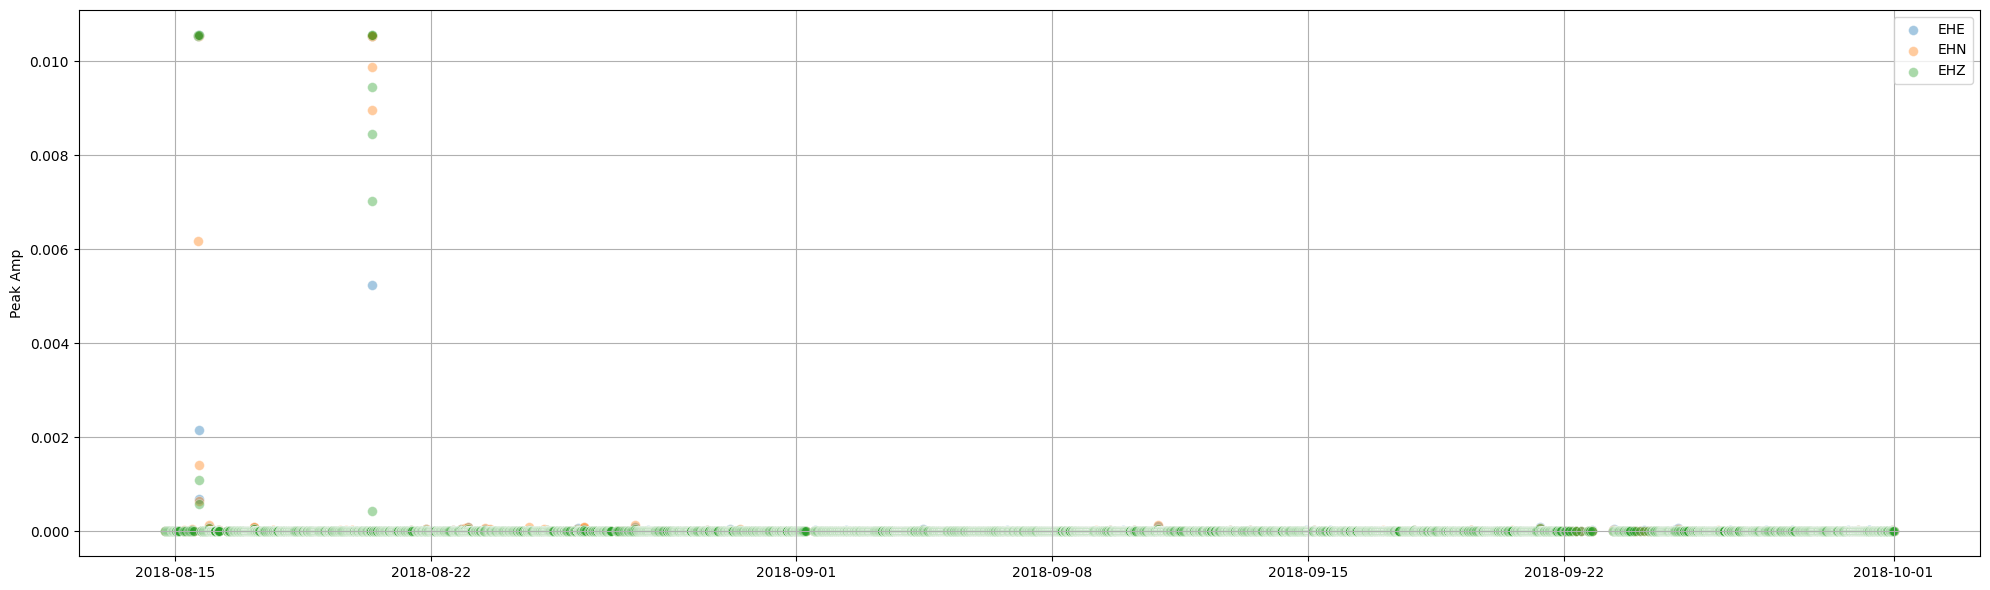

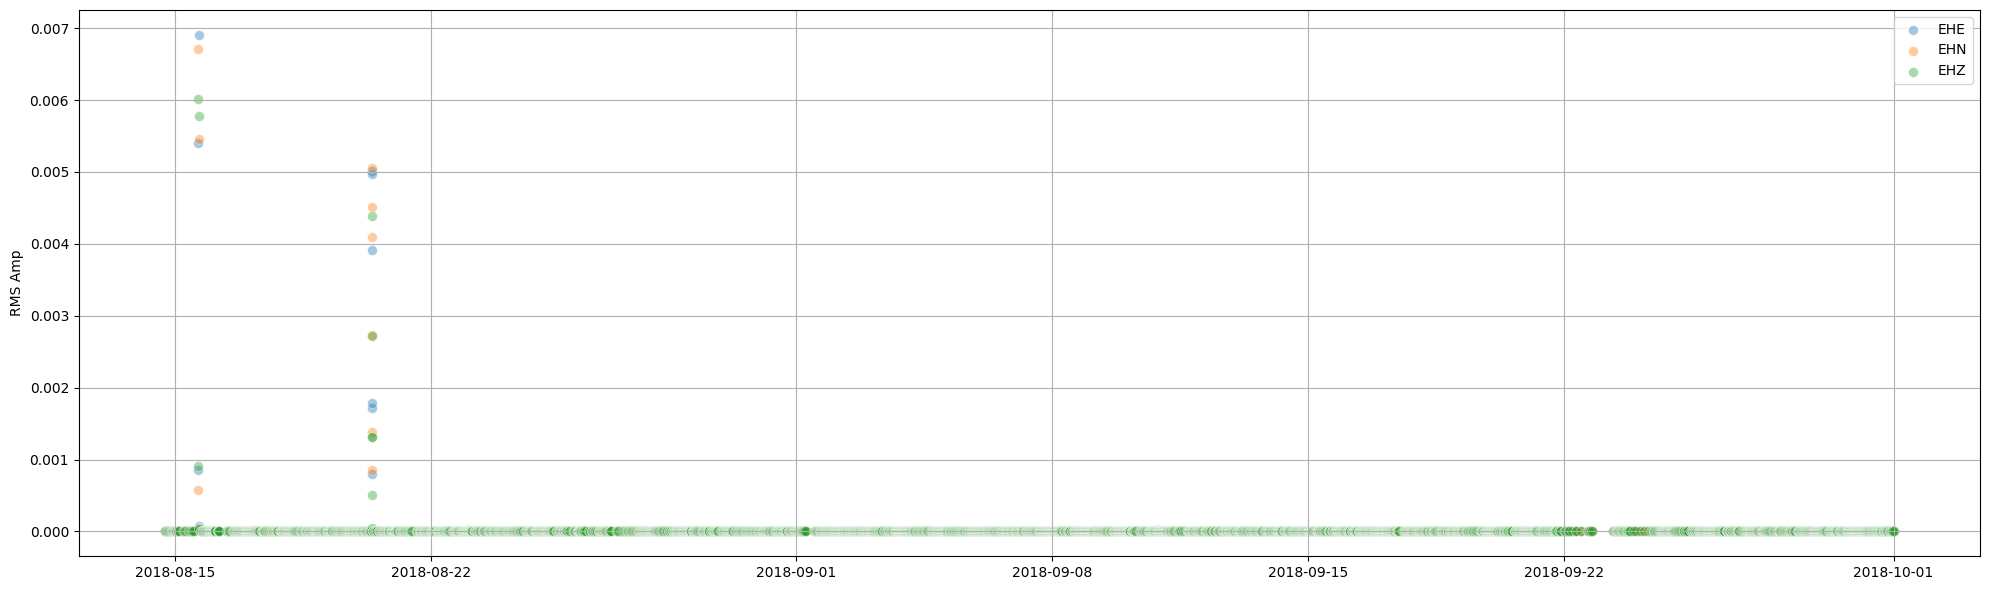

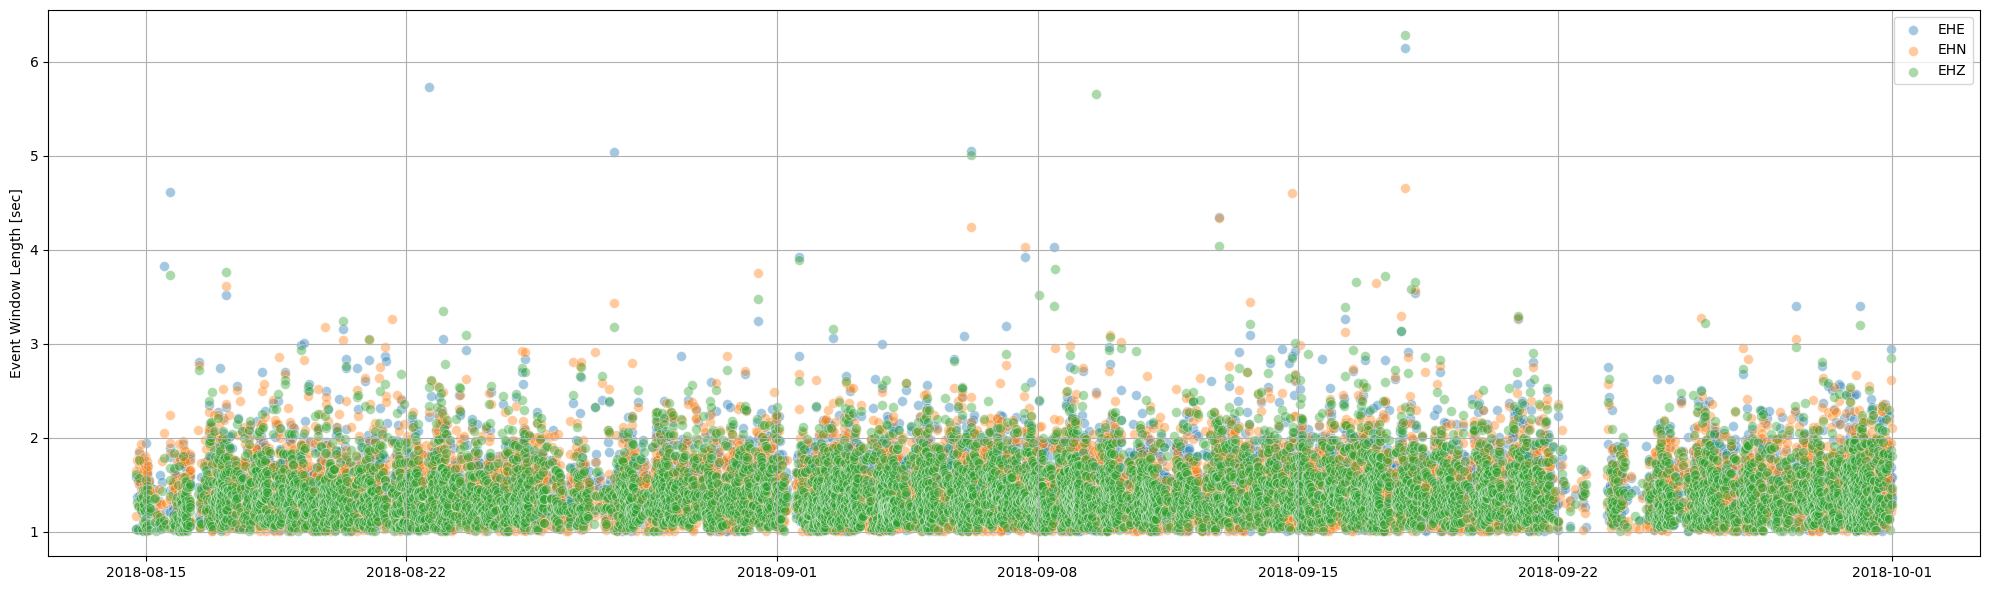

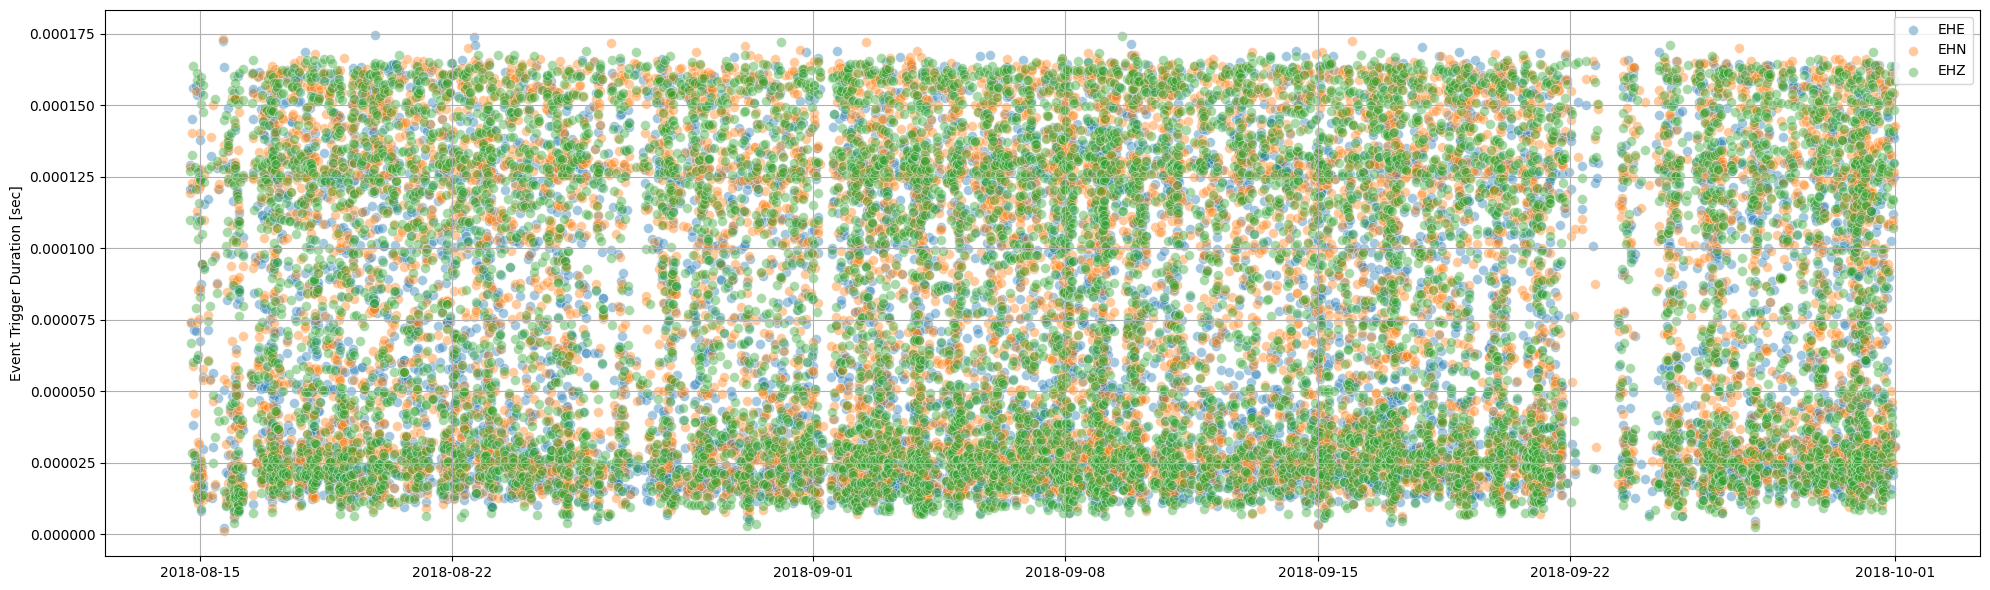

In [7]:
# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=merged, x='detectiontime', y='peak_amp_EHE', label='EHE', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='peak_amp_EHN', label='EHN', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='peak_amp_EHZ', label='EHZ', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("Peak Amp")
# plt.title("Signal Duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'coincidence_peakamplitude__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=merged, x='detectiontime', y='rms_amp_EHE', label='EHE', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='rms_amp_EHN', label='EHN', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='rms_amp_EHZ', label='EHZ', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("RMS Amp")
# plt.title("Signal Duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'coincidence_rmsamplitude__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)

# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=merged, x='detectiontime', y='windowlength_EHE', label='EHE', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='windowlength_EHN', label='EHN', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='windowlength_EHZ', label='EHZ', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("Event Window Length [sec]")
# plt.title("Signal Duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'coincidence_windowlength__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)


# Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=merged, x='detectiontime', y='triggerduration_EHE', label='EHE', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='triggerduration_EHN', label='EHN', s=50, alpha=0.4)
sns.scatterplot(data=merged, x='detectiontime', y='triggerduration_EHZ', label='EHZ', s=50, alpha=0.4)

plt.xlabel("")
plt.ylabel("Event Trigger Duration [sec]")
# plt.title("Signal Duration")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

fname = 'coincidence_triggerduration__{:s}'.format(year)
plt.savefig(plot_dir + fname + '.png', dpi=300)
